<a href="https://colab.research.google.com/github/catavasia/ML_FIAN-21/blob/main/seminar04_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1

(Titanic data again)

Build a model with `sklearn`'s `LogisticRegression` or `SVC` to get the accuracy of at least 0.81 on the test set. Can you get higher? 0.84?

Some (optional) suggestions:
- Add new features (e.g. missing value indicator columns)
- Fill missing values
- Encode categorical features (e.g. one-hot encoding)
- Scale the features (e.g. with standard or robust scaler)
- Think of other ways of preprocessing the features (e.g. `Fare` $\to$ `log(Fare)`)
- Try adding polynomial features
- use `sklearn.model_selection.GridSearchCV` to search for the best hyperparameters (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)



In [ ]:
!wget https://github.com/HSE-LAMBDA/MLatFIAN2021/raw/main/seminar01/train.csv

--2021-10-29 08:30:13--  https://github.com/HSE-LAMBDA/MLatFIAN2021/raw/main/seminar01/train.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2021/main/seminar01/train.csv [following]
--2021-10-29 08:30:13--  https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2021/main/seminar01/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2021-10-29 08:30:13 (4.96 MB/s) - ‘train.csv’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Посмотрим, где есть пропуски

In [ ]:
train_features = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy() 
for name in ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']:
  if train_features[name].isna().sum() != 0:
    print(name)

Age
Embarked


# Выбираем параметры

In [ ]:
def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
  feature_names = ['Pclass', 'Sex', 'Age',  'SibSp','Parch', 'Fare', 'Embarked']
  features = dataset[feature_names].copy()
  features["Age"] = features.Age.fillna(dataset.Age.median())
  features['Embarked'] = features.Embarked.fillna('unknown')

  return features



#parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C': [0.1, 0.6, 1, 5, 9, 10, 15] }
#clf = GridSearchCV(SVC(), parameters)



model = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(sparse=False), ['Sex', 'Embarked']),
        remainder='passthrough'
    ),
    StandardScaler(),
    #clf
    SVC(kernel='rbf', C=5)
)


#Обучение и тест

In [ ]:
# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=200, random_state=42) 
model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

train_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    )
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)

print("Train accuracy:", accuracy_score(
    data_train['Survived'],
    train_predictions
))
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))


Train accuracy: 0.8509406657018813
Test accuracy: 0.83


 # Back-up

In [ ]:
model.named_steps['gridsearchcv'].best_params_

{'C': 5, 'kernel': 'rbf'}

In [ ]:
names = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for index, value in enumerate(model.named_steps['logisticregression'].coef_[0]):
  print(names[index], value)

Pclass -0.6895585072401285
Age -0.4272857211863892
SibSp -0.27873391865965835
Parch 0.1772048209059178
Fare 0.25278602227101304


In [ ]:
?SVC

In [ ]:
def fit_and_plot(X, y, model, Nx=800, Ny=800):
  # Splitting the dataset and fitting on the train part
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

  model.fit(X_train, y_train)

  # Plotting the `|margin| < 1` band
  grid_x0 = np.linspace(X[:,0].min() - 0.5, X[:,0].max() + 0.5, Nx)
  grid_x1 = np.linspace(X[:,1].min() - 0.5, X[:,1].max() + 0.5, Ny)

  xx0, xx1 = np.meshgrid(grid_x0, grid_x1)
  zz = model.decision_function(
      np.c_[xx0.ravel(), xx1.ravel()]
  ).reshape(xx0.shape)

  plt.contourf(xx0, xx1, zz, cmap=plt.cm.RdBu, alpha=.8, linestyles=['--', '-', '--'], levels=[-1, 0, 1])
  plt.contour(xx0, xx1, zz, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

  # Highlighting support vectors
  if hasattr(model, "named_steps"):
    sv = model[:-1].inverse_transform(
        model.named_steps['svc'].support_vectors_
    )
  else:
    sv = model.support_vectors_
  plt.scatter(*sv.T, s=180, facecolors='none', zorder=10, edgecolors='black', linewidths=0.5)

  # Plotting the data points
  plt.scatter(*X_train.T, c=y_train, cmap=cm_bright, alpha=0.3, s=36)
  plt.scatter(*X_test.T, c=y_test, cmap=cm_bright, alpha=0.8, s=36, marker='<')

  # Tweaking the plot a bit
  plt.xlim(xx0.min(), xx0.max())
  plt.ylim(xx1.min(), xx1.max())
  plt.xlabel("x0")
  plt.ylabel("x1")

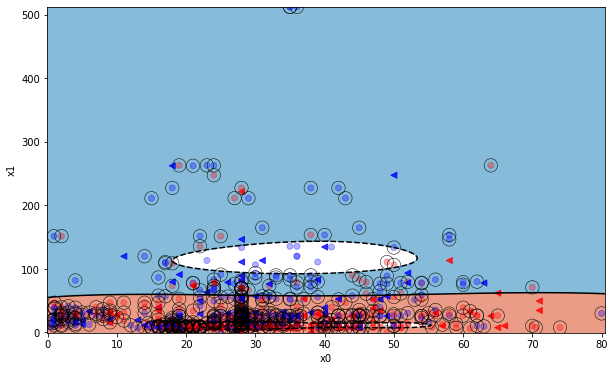

In [ ]:
X = data[['Age', 'Fare']].copy()
X["Age"] = X.Age.fillna(data.Age.median())
y = np.array(data[['Survived']].copy()).ravel()
model = make_pipeline(
    RobustScaler(),
    SVC(C=0.1, kernel='rbf')
)

plt.figure(figsize=(10, 6))
fit_and_plot(np.array(X),y , model)